# Part 1 - get temperature and original RGB image

In [47]:
import pandas as pd
import numpy as np
import matplotlib
import flirimageextractor
from matplotlib import pyplot as plt, cm

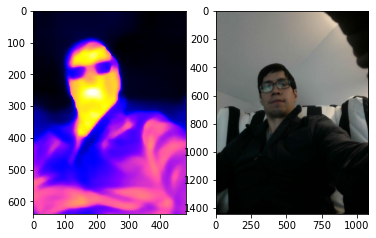

In [88]:
image_prefix = '20200428T112219'
image_suffix = '.jpg'
image_fname = image_prefix + image_suffix
image_input_dir = 'examples/'
image_output_dir = 'output/'

flir = flirimageextractor.FlirImageExtractor(palettes=[cm.jet, cm.bwr, cm.gist_ncar])
flir.process_image(image_input_dir + image_fname, RGB=True)
flir.save_images()
flir.plot()

In [89]:
# save the RGB / embedded image
matplotlib.image.imsave(image_output_dir + image_prefix + '_rgb' + image_suffix, flir.extract_embedded_image())
# save the thermal image
matplotlib.image.imsave(image_output_dir + image_prefix + '_thermal' + image_suffix, flir.extract_thermal_image())

In [116]:
print("Max temp F:", (np.amax(flir.get_thermal_np()) * 9/5) + 32)

Max temp F: 96.77604735141884


In [117]:
if ((np.amax(flir.get_thermal_np()) * 9/5) + 32) > 100.0:
    print("You have a fever")
else:
    print("You don't have a fever")

You don't have a fever


In [90]:
flir.get_metadata(image_input_dir + image_fname)

{'SourceFile': 'examples/20200428T112219.jpg',
 'ExifToolVersion': 11.96,
 'FileName': '20200428T112219.jpg',
 'Directory': 'examples',
 'FileSize': '855 kB',
 'FileModifyDate': '2020:04:28 11:22:53-04:00',
 'FileAccessDate': '2020:04:28 11:22:53-04:00',
 'FileCreateDate': '2020:04:28 11:22:45-04:00',
 'FilePermissions': 'rw-rw-rw-',
 'FileType': 'JPEG',
 'FileTypeExtension': 'jpg',
 'MIMEType': 'image/jpeg',
 'JFIFVersion': 1.01,
 'ExifByteOrder': 'Little-endian (Intel, II)',
 'Make': 'FLIR Systems AB',
 'Model': 'FLIR ONE',
 'Orientation': 'Horizontal (normal)',
 'XResolution': 72,
 'YResolution': 72,
 'ResolutionUnit': 'inches',
 'Software': 'Common_dll v1.0.0b1',
 'ModifyDate': '2020:04:28 11:21:27',
 'YCbCrPositioning': 'Centered',
 'ExifVersion': '0220',
 'CreateDate': '2020:04:28 11:21:27',
 'ComponentsConfiguration': '-, Cr, Cb, Y',
 'SubjectDistance': '3 m',
 'ImageTemperatureMax': 213,
 'ImageTemperatureMin': 213,
 'FlashpixVersion': '0100',
 'ColorSpace': 'sRGB',
 'ExifImage

In [91]:
thermal_image = pd.DataFrame(flir.get_thermal_np())
thermal_image

,0,1,2,3,4,5,6,7,8,9,...,470,471,472,473,474,475,476,477,478,479
0,17.207360,17.207360,17.207360,17.207360,17.207360,17.207360,17.207360,17.207360,17.207360,17.207360,...,17.006264,17.006264,17.006264,17.006264,17.006264,17.006264,17.006264,17.006264,16.939138,16.939138
1,17.207360,17.207360,17.207360,17.207360,17.207360,17.207360,17.207360,17.207360,17.207360,17.207360,...,17.006264,17.006264,17.006264,17.006264,17.006264,17.006264,17.006264,17.006264,16.939138,16.939138
2,17.207360,17.207360,17.207360,17.207360,17.207360,17.207360,17.207360,17.207360,17.207360,17.207360,...,17.006264,17.006264,17.006264,17.006264,17.006264,17.006264,17.006264,17.006264,16.939138,16.939138
3,17.207360,17.207360,17.207360,17.207360,17.207360,17.207360,17.207360,17.207360,17.207360,17.207360,...,17.006264,17.006264,17.006264,17.006264,17.006264,17.006264,17.006264,17.006264,16.939138,16.939138
4,17.207360,17.207360,17.207360,17.207360,17.207360,17.207360,17.207360,17.207360,17.207360,17.207360,...,17.006264,17.006264,17.006264,17.006264,17.006264,17.006264,17.006264,17.006264,16.939138,16.939138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,25.364876,25.364876,25.426565,25.426565,25.488218,25.549834,25.611413,25.734461,25.795931,25.918761,...,26.102735,26.102735,26.163987,26.163987,26.163987,26.163987,26.225203,26.225203,26.225203,26.225203
636,25.179587,25.241387,25.241387,25.303150,25.364876,25.426565,25.488218,25.611413,25.672955,25.795931,...,26.102735,26.102735,26.102735,26.102735,26.163987,26.163987,26.163987,26.163987,26.225203,26.225203
637,25.117751,25.117751,25.117751,25.179587,25.241387,25.303150,25.426565,25.488218,25.611413,25.672955,...,26.102735,26.102735,26.102735,26.102735,26.163987,26.163987,26.163987,26.163987,26.225203,26.225203
638,25.055877,25.055877,25.055877,25.117751,25.117751,25.241387,25.303150,25.426565,25.488218,25.611413,...,26.041446,26.041446,26.102735,26.102735,26.102735,26.102735,26.163987,26.163987,26.225203,26.225203


# Part 2 - Face recognition

In [55]:
from PIL import Image
import face_recognition

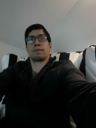

I found 1 face(s) in this photograph.
A face is located at pixel location Top: 379, Left: 290, Bottom: 647, Right: 557


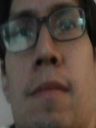

In [108]:
image = face_recognition.load_image_file("output/20200428T112120_rgb.jpg")
display(Image.fromarray(image).resize((96,128)))

face_locations = face_recognition.face_locations(image)

print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
    display(pil_image.resize((96,128)))

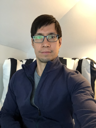

training/IMG_1319.jpg: it me!


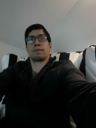

training/20200428T112120_rgb.jpg: it me!


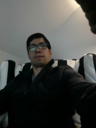

training/20200428T112217_rgb.jpg: it me!


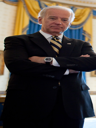

training/biden.jpg: it not me!


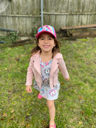

training/viv.jpg: it not me!


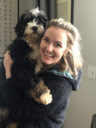

training/kate.jpg: it not me!


In [111]:
train_pictures = {
    'training/IMG_1319.jpg': 'josh',
    'training/20200428T112120_rgb.jpg': 'josh',
    'training/20200428T112217_rgb.jpg': 'josh',
    'training/biden.jpg': 'biden',
    'training/viv.jpg': 'viv',
    'training/kate.jpg': 'kate'
}

for pic in train_pictures:
    test_picture = face_recognition.load_image_file(pic)
    test_face_encoding = face_recognition.face_encodings(test_picture)[0]
    known_picture = face_recognition.load_image_file("training/josh.jpg")
    known_face_encoding = face_recognition.face_encodings(known_picture)[0]
    results = face_recognition.compare_faces([test_face_encoding], known_face_encoding)
    if results[0] == True:
        display(Image.fromarray(test_picture).resize((96,128)))
        print(pic + ": it me!")
    else:
        display(Image.fromarray(test_picture).resize((96,128)))
        print(pic + ": it not me!")

# TODO: load up all known encodings into a dictionary then 

In [ ]:
# TODO: 
# 1) make above faster to process for 50-100 people in the training set. Consider https://github.com/ageitgey/face_recognition/blob/master/examples/face_recognition_knn.py
# 2) pull back pixels from recognized face and only check thermal temperature of those pixels in the thermal image
# 3) push this to the edge in expo / react native